In [1]:
#Importacion de librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Lectura de datos
Data1 = pd.read_csv('Car details v3.csv')
Data1.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
#Descripcion de los datos
Data1.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [13]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Year: ",Data1['year'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio: ",Data1['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en Km: ",Data1['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Sillas: ",Data1['seats'].isin([0]).sum())

Cantidad de Registros con cero en Year:  0
Cantidad de Registros con cero en Precio:  0
Cantidad de Registros con cero en Km:  0
Cantidad de Registros con cero en Sillas:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

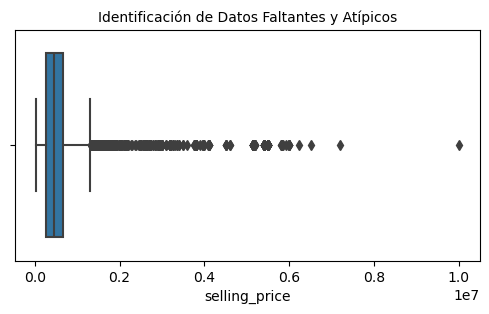

In [15]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data1['selling_price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [35]:
#Conteo de Datos Atípicos Precio

nivel_minimo=0
nivel_maximo=800000
Total_Atipicos=((Data1['selling_price']<nivel_minimo)|(Data1['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 425


In [24]:
# Filtra Datos Atípicos

Data1=Data1[(Data1['selling_price']<nivel_maximo)&(Data1['selling_price']>nivel_minimo)]

In [25]:
Total_Atipicos=((Data1['selling_price']<nivel_minimo)|(Data1['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [36]:
#Conteo de Datos Atípicos Km

nivel_minimo=0
nivel_maximo=800000
Total_Atipicos=((Data1['km_driven']<nivel_minimo)|(Data1['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [37]:
# Filtra Datos Atípicos

Data1=Data1[(Data1['km_driven']<nivel_maximo)&(Data1['km_driven']>nivel_minimo)]

In [38]:
Total_Atipicos=((Data1['km_driven']<nivel_minimo)|(Data1['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

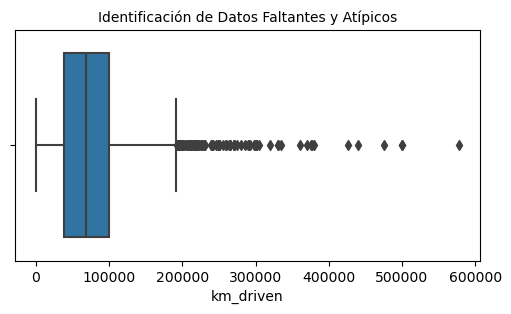

In [40]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data1['km_driven'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [41]:
#Revisión del tipo de datos y datos faltantes

Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7256 non-null   object 
 1   year           7256 non-null   int64  
 2   selling_price  7256 non-null   int64  
 3   km_driven      7256 non-null   int64  
 4   fuel           7256 non-null   object 
 5   seller_type    7256 non-null   object 
 6   transmission   7256 non-null   object 
 7   owner          7256 non-null   object 
 8   mileage        7037 non-null   object 
 9   engine         7037 non-null   object 
 10  max_power      7043 non-null   object 
 11  torque         7036 non-null   object 
 12  seats          7037 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 793.6+ KB


In [42]:
# Cotneo de Precios

Data1['selling_price'].value_counts()

selling_price
300000    227
600000    213
350000    209
550000    203
450000    195
         ... 
94500       1
911999      1
449000      1
698000      1
746000      1
Name: count, Length: 515, dtype: int64

In [43]:
Data1[['selling_price']].head(10)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [52]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data1.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna selling_price 
Y = Data1['selling_price'] # Se cargan los datos de train con los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

print (X_train)

                                 name  year  km_driven    fuel  \
4175          Mahindra Scorpio 2.6 DX  2006      90000  Diesel   
7761         Maruti Vitara Brezza ZDi  2018      17000  Diesel   
6847  Mahindra KUV 100 mFALCON G80 K2  2017      32000  Petrol   
4639              Maruti Alto K10 LXI  2010      70000  Petrol   
2487                  Maruti Alto LXi  2010      48000  Petrol   
...                               ...   ...        ...     ...   
5554           Maruti Swift Dzire VDI  2015     100000  Diesel   
3653       Tata Tiago 1.2 Revotron XT  2018      50000  Petrol   
1869              Maruti Baleno Delta  2017      25272  Petrol   
2913                  Hyundai Verna S  2012      60000  Petrol   
3046                    Maruti 800 DX  1998      80000  Petrol   

           seller_type transmission                 owner     mileage  \
4175        Individual       Manual           First Owner   12.7 kmpl   
7761            Dealer       Manual           First Owner   2

In [48]:
print (Y_train)

4175    350000
7761    835000
6847    400000
4639    145000
2487    160000
         ...  
5554    600000
3653    350000
1869    570000
2913    415000
3046     45000
Name: selling_price, Length: 5442, dtype: int64


In [101]:
X_train = X_train.select_dtypes(include=['number'])
print(X_train)

      year  km_driven  seats
4175  2006      90000    8.0
7761  2018      17000    5.0
6847  2017      32000    6.0
4639  2010      70000    5.0
2487  2010      48000    5.0
...    ...        ...    ...
5554  2015     100000    5.0
3653  2018      50000    5.0
1869  2017      25272    5.0
2913  2012      60000    5.0
3046  1998      80000    4.0

[5442 rows x 3 columns]


In [102]:
# Construir el modelo de regresión lineal 

model = LinearRegression()  
model.fit(X_train, Y_train)


LinearRegression()

In [111]:
print(X_test)

[[2.01300000e+03 1.20000000e+05 5.00000000e+00]
 [2.01600000e+03 2.50000000e+04 5.00000000e+00]
 [2.01000000e+03 1.20000000e+05 5.00000000e+00]
 ...
 [2.01000000e+03 4.00000000e+04 5.38226937e+00]
 [2.00900000e+03 1.20000000e+05 5.00000000e+00]
 [2.01900000e+03 1.50000000e+04 5.00000000e+00]]


In [110]:
prediccion = model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [94]:
print (prediccion)

[392824.22737159 503487.11313863 279131.32583931 ... 298284.55114244
 241233.69199522 616861.06564298]


Text(0, 0.5, 'Prediccion')

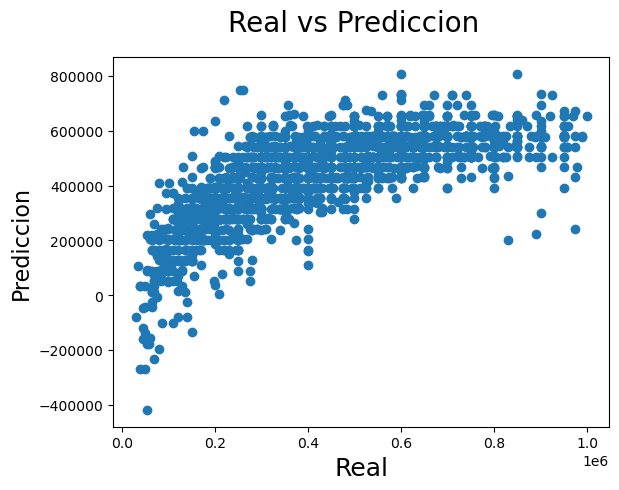

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,prediccion)
fig.suptitle('Real vs Prediccion', fontsize=20)              # Plot heading 
plt.xlabel('Real', fontsize=18)                          # X-label
plt.ylabel('Prediccion', fontsize=16)                          # Y-label

In [118]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

r2 = r2_score(Y_test,prediccion)
print('Raíz del Error Cuadrático Medio (RMSE): ',r2)

mse = mean_squared_error(Y_test,prediccion)
print('Error Cuadrático Medio: ',mse)

mae = mean_absolute_error(Y_test,prediccion)
print('Error Absoluto Medio: ',mae)

Raíz del Error Cuadrático Medio (RMSE):  0.5163407218181275
Error Cuadrático Medio:  24297842956.11494
Error Absoluto Medio:  122708.03782503278
